# Market Segmentation and Targeting Analysis 

## necessary libs 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = 'mcdonalds.csv'
data = pd.read_csv(file_path)

## data cleaning and getting a picture of the market segment 

In [21]:
# Function to extract numeric values from strings
import re
def extract_numeric_value(val):
    match = re.search(r'[-+]?\d+', val)
    return int(match.group()) if match else None

# Apply function to 'Like' column
data['Like'] = data['Like'].apply(extract_numeric_value)

# Drop rows with NaN values in 'Like' column (if any)
data = data.dropna(subset=['Like'])

# Aggregating data to understand segment preferences
segment_analysis = data.groupby(['VisitFrequency', 'Gender']).agg({
    'Like': ['mean', 'std', 'count'],
    'Age': ['mean', 'std']
}).reset_index()

# Renaming columns for clarity
segment_analysis.columns = ['VisitFrequency', 'Gender', 'Like_mean', 'Like_std', 'Like_count', 'Age_mean', 'Age_std']
segment_analysis = segment_analysis.sort_values(by='Like_mean', ascending=False)

# Displaying the segment analysis
print(segment_analysis)


           VisitFrequency  Gender  Like_mean  Like_std  Like_count   Age_mean  \
2   More than once a week  Female   4.076923  1.354196          26  34.846154   
3   More than once a week    Male   3.642857  1.725930          28  40.821429   
8             Once a week  Female   3.313559  1.915743         118  38.745763   
9             Once a week    Male   2.641026  2.147418         117  38.760684   
6            Once a month  Female   2.383966  2.041995         237  42.375527   
7            Once a month    Male   2.029703  2.065858         202  42.222772   
0      Every three months  Female   0.726316  2.492070         190  46.647368   
1      Every three months    Male   0.388158  2.358722         152  46.690789   
10            Once a year  Female  -1.486842  2.433178         152  49.572368   
11            Once a year    Male  -2.120000  2.594789         100  48.850000   
4                   Never  Female  -3.861538  1.810360          65  52.830769   
5                   Never   

## visualizing the data 

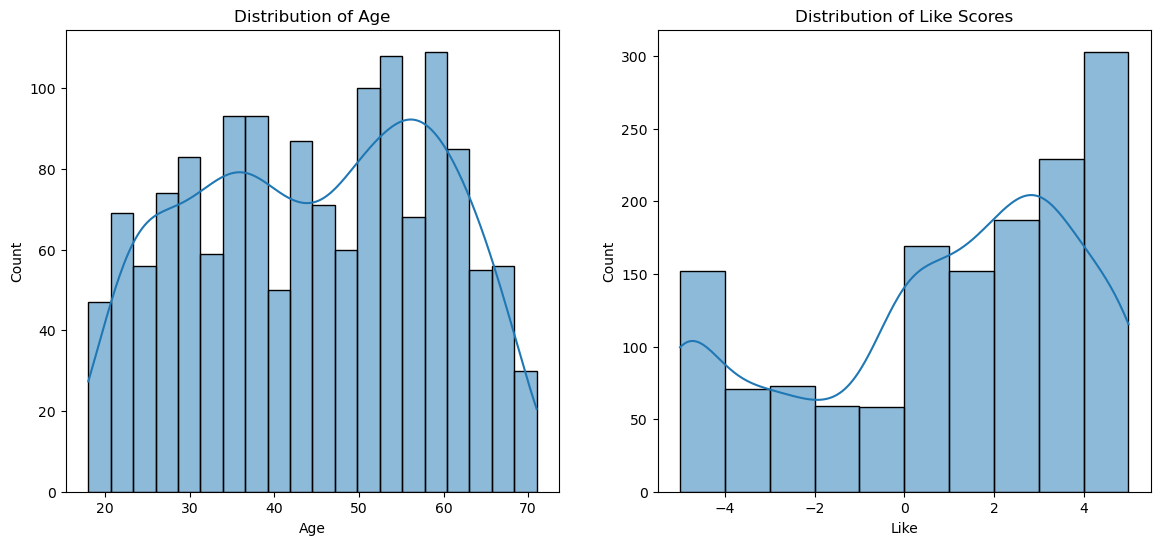

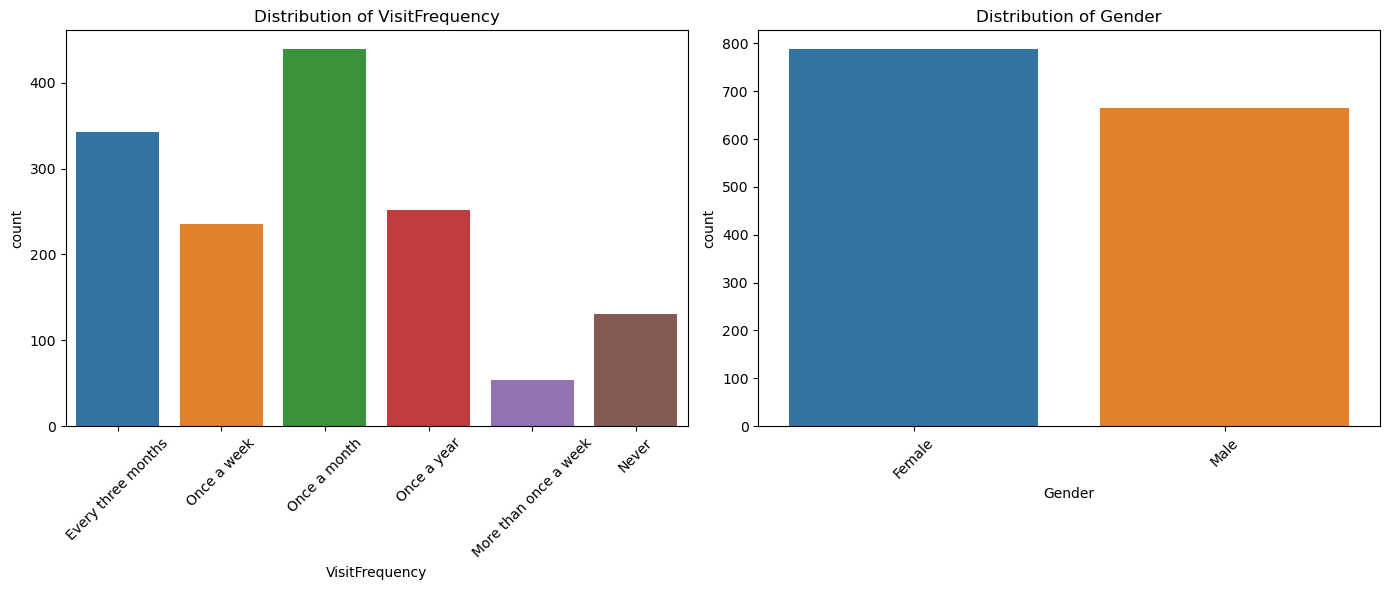

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions for 'Age' and cleaned 'Like'
plt.figure(figsize=(14, 6))

# Distribution of Age
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

# Distribution of Like Scores
plt.subplot(1, 2, 2)
sns.histplot(data['Like'], bins=10, kde=True)
plt.title('Distribution of Like Scores')
plt.show()

# Count plots for categorical variables
categorical_vars = ['VisitFrequency', 'Gender']

plt.figure(figsize=(14, 6))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=data[var])
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## checking Segment Differences 

In [26]:
from scipy.stats import ttest_ind

# Test for differences in 'Like' scores between genders
female_likes = data[data['Gender'] == 'Female']['Like']
male_likes = data[data['Gender'] == 'Male']['Like']
t_stat, p_value = ttest_ind(female_likes, male_likes)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 1.8720595052750069, P-value: 0.061399389991867344


## Predicting Segments from Descriptor Variables

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Preparing the data for predictive modeling
X = data[['Age']]  # Example using Age as a predictor
y = data['Like'] >= 0  # Binary classification: Like (>=0) vs Dislike (<0)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Binary Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        96
        True       0.67      1.00      0.80       195

    accuracy                           0.67       291
   macro avg       0.34      0.50      0.40       291
weighted avg       0.45      0.67      0.54       291

Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.08      0.14        96
        True       0.68      0.96      0.80       195

    accuracy                           0.67       291
   macro avg       0.59      0.52      0.47       291
weighted avg       0.62      0.67      0.58       291



D:\data-science\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\data-science\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\data-science\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## target segment 

In [28]:
# Evaluating segments according to aggregated data
target_segments = segment_analysis[segment_analysis['Like_mean'] > 2]  # Example criteria

# Display target segments
print(target_segments)


          VisitFrequency  Gender  Like_mean  Like_std  Like_count   Age_mean  \
2  More than once a week  Female   4.076923  1.354196          26  34.846154   
3  More than once a week    Male   3.642857  1.725930          28  40.821429   
8            Once a week  Female   3.313559  1.915743         118  38.745763   
9            Once a week    Male   2.641026  2.147418         117  38.760684   
6           Once a month  Female   2.383966  2.041995         237  42.375527   
7           Once a month    Male   2.029703  2.065858         202  42.222772   

     Age_std  
2  15.668292  
3  15.246259  
8  12.522244  
9  13.782579  
6  13.563032  
7  13.831426  
